In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train-perceptron.txt'] ), sep=" " ,  header = None, dtype = 'float64')
print(df)

     0    1    2
0  1.0  1.0  1.0
1  1.0 -1.0  1.0
2  2.0  2.5  2.0
3  0.0  2.0  2.0
4  2.0  3.0  2.0
5  4.0  5.0  1.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# **Task 1**

In [4]:
train_data = pd.read_csv('train-perceptron.txt', sep = ' ', header = None)

train_X = train_data.iloc[:, 0:2]
train_Y = train_data.iloc[:, 2]
train_X = np.array(train_X)
train_Y = np.array(train_Y)

# To check if data is successfully retrieved
print(train_X)
print(train_Y)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 2.   2.5]
 [ 0.   2. ]
 [ 2.   3. ]
 [ 4.   5. ]]
[1 1 2 2 2 1]


In [5]:
class1_X1, class1_X2, class2_X1, class2_X2 = [], [], [], []

for i in range(train_X.shape[0]):
  if train_Y[i] == 1:
    class1_X1.append(train_X[i, 0])
    class1_X2.append(train_X[i, 1])
  else:
    class2_X1.append(train_X[i, 0])
    class2_X2.append(train_X[i, 1])

# To check if data is successfully retrieved
print(class1_X1)
print(class1_X2)
print(class2_X1)
print(class2_X2)

[1.0, 1.0, 4.0]
[1.0, -1.0, 5.0]
[2.0, 0.0, 2.0]
[2.5, 2.0, 3.0]


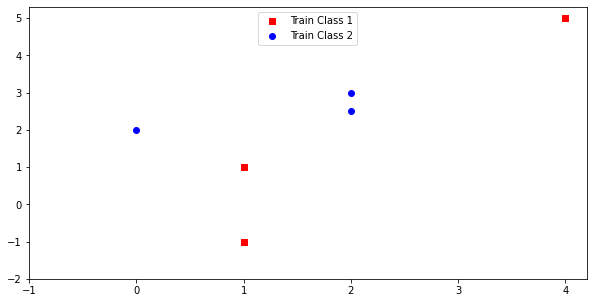

In [6]:
limit_X1 = list(map(int, class1_X1 + class2_X1))
limit_X2 = list(map(int, class1_X2 + class2_X2))

plt.figure(figsize = (10, 5))
# Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 's')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'blue', marker = 'o')
# Plot Accessory
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(min(limit_X2) - 1, max(limit_X2) + 1)])
plt.legend(loc = 'upper center')
plt.show()

**These two classes cannot be separated with a linear boundary.**

# **Task 2**

In [ ]:
trainPoints = np.zeros((train_X.shape[0], 6))

j = len(class1_X1)

for i in range(j):
  trainPoints[i, :] = np.array([class1_X1[i] ** 2, class1_X2[i] ** 2,
                                class1_X1[i] * class1_X2[i], class1_X1[i],
                                class1_X2[i], 1])


for i in range(len(class2_X1)):
  trainPoints[i + j, :] = np.array([class2_X1[i] ** 2, class2_X2[i] ** 2,
                                    class2_X1[i] * class2_X2[i], class2_X1[i],
                                    class2_X2[i], 1])

# To check if data is successfully retrieved
print(trainPoints)

In [ ]:
for i in range(j, 0, -1):
  trainPoints[-i, :] *= -1

# To check if data is successfully retrieved
print(trainPoints)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]
